In [84]:
import pandas as pd
import numpy as np

review=pd.read_csv('review_nc_asheville.csv')
listing=pd.read_csv('listing_nc_asheville.csv')

#1. Let us join the data first into one table
merged=pd.merge(listing,review,on='listing_id')
merged.head()

,listing_id,zipcode,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,minimum_nights,...,instant_bookable,cancellation_policy,is_business_travel_ready,price_per_person,host_is_superhost,review_id,date,reviewer_id,reviewer_name,sentiment
0,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,f,moderate,f,30.0,t,198797,3/14/2011,411638,Jessienne,0.639601
1,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,f,moderate,f,30.0,t,201932,3/17/2011,441855,Bill,0.861001
2,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,f,moderate,f,30.0,t,341616,6/28/2011,657560,Joakim,0.718540
3,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,f,moderate,f,30.0,t,369937,7/12/2011,792195,Gabrielle,0.507613
4,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,f,moderate,f,30.0,t,376614,7/16/2011,768992,Horst,0.262807


The above result shows the dataframe - merged , after joining the review dataframe and listing dataframe using inner join. 

In [26]:
#2. Let us get an idea of how the merged table looks like
merged.shape
merged.columns
merged.describe()

,listing_id,zipcode,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights,host_listings_count,price_per_person,review_id,reviewer_id,sentiment
count,1.473390e+05,146155.000000,147339.000000,147339.000000,147156.000000,147339.000000,147338.000000,147339.000000,147339.000000,147339.000000,1.473390e+05,1.473390e+05,147339.000000
mean,1.141278e+07,28798.507372,35.583347,-82.559164,1.188256,1.336903,1.737183,4.709371,2.772504,37.989413,1.877395e+08,6.653603e+07,0.380812
std,7.805519e+06,21.453325,0.038532,0.042917,0.491695,0.929120,1.217420,10.871545,10.623780,25.107255,1.067412e+08,5.794581e+07,0.187726
min,3.858500e+04,28701.000000,35.407702,-82.770131,0.000000,0.000000,0.000000,1.000000,0.000000,3.500000,1.987970e+05,6.100000e+01,-1.016667
25%,4.045013e+06,28801.000000,35.573400,-82.588910,1.000000,1.000000,1.000000,1.000000,1.000000,24.500000,9.388728e+07,1.970705e+07,0.265825
50%,1.170103e+07,28804.000000,35.587130,-82.558600,1.000000,1.000000,1.000000,2.000000,1.000000,33.500000,1.948376e+08,4.820984e+07,0.363233
75%,1.793540e+07,28806.000000,35.604230,-82.534220,1.000000,2.000000,2.000000,2.000000,2.000000,46.000000,2.790624e+08,1.025723e+08,0.475000
max,3.105452e+07,28815.000000,35.685558,-82.417304,12.500000,34.000000,16.000000,180.000000,760.000000,2500.000000,3.649326e+08,2.331770e+08,2.967021


The above table shows us the descriptive statistics of merged dataframe. 

In [27]:
#3. Drop null values and fill null vlaues with relevant summary statistics
merged.isnull().sum() # zipcode,bathrooms,beds,cancellation_policy and is_business_travel_ready have null values
merged.fillna({'bathrooms':merged['bathrooms'].mean(),'beds':merged['beds'].mean(),'zipcode':00000.0,'is_business_travel_ready':'f'}, inplace=True)
merged.dropna(how='any', inplace=True)
merged.isnull().sum()

listing_id                  0
zipcode                     0
latitude                    0
longitude                   0
property_type               0
room_type                   0
bathrooms                   0
bedrooms                    0
beds                        0
minimum_nights              0
host_listings_count         0
instant_bookable            0
cancellation_policy         0
is_business_travel_ready    0
price_per_person            0
host_is_superhost           0
review_id                   0
date                        0
reviewer_id                 0
reviewer_name               0
sentiment                   0
dtype: int64

In [37]:
#4. Let us clean the data further using functions:
merged.dtypes
merged['zipcode'] = merged['zipcode'].astype(int)
merged['bathrooms'] = merged['bathrooms'].astype(int)
merged['bedrooms'] = merged['bedrooms'].astype(int)
merged['beds'] = merged['beds'].astype(int)
merged['price_per_person'] = merged['price_per_person'].round(2)
merged['sentiment'] = merged['sentiment'].round(2)
merged.sort_values('sentiment',ascending=False,inplace=True)
merged['instant_bookable_binary']=np.where(merged.instant_bookable == 't',1,0)
merged['is_business_travel_ready_binary']=np.where(merged.is_business_travel_ready == 't',1,0)
merged['host_is_superhost_binary']=np.where(merged.host_is_superhost == 't',1,0)
merged.head()

,listing_id,zipcode,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,minimum_nights,...,review_id,date,reviewer_id,reviewer_name,sentiment,instant_bookable_binary,is_business_travel_ready_binary,host_is_superhost_binary,in_datetime,year
53681,6698737,28806,35.575910,-82.59421,Private room in bungalow,Private room,1,1,1,28,...,272981204,6/4/2018,12545824,David,2.97,0,0,1,2018-06-04,2018
133625,22076023,28804,35.625548,-82.55522,House,Private room,1,1,1,2,...,331007698,10/1/2018,22306297,Joe,2.96,0,0,1,2018-10-01,2018
129494,21131816,28806,35.612530,-82.59418,Private room in residential home,Private room,1,1,1,1,...,285360052,7/3/2018,107491373,Dustin,2.02,0,0,1,2018-07-03,2018
106655,17206606,28787,35.612180,-82.56962,House,Private room,1,1,1,1,...,287103376,7/7/2018,9679491,Ryan,1.94,1,0,0,2018-07-07,2018
25621,2477628,28801,35.589390,-82.56782,Entire residential home,Entire home/apt,1,2,2,75,...,192618104,9/10/2017,3438848,Raj,1.92,0,0,1,2017-09-10,2017


In the above data cleaning attempt, I converted integer values not needing a decimal point (like zipcode) to int. I also rounded floating point values to 2 decimal places for concise data. Then, I created binary values for columns having 't' and 'f' entries to be able to run regression on the data set later. 

<AxesSubplot:xlabel='price_per_person', ylabel='sentiment'>

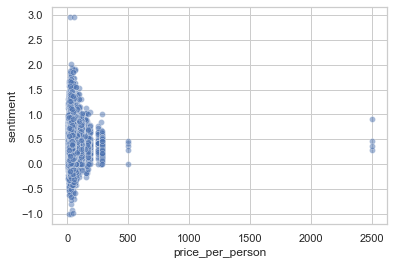

In [97]:
import seaborn

seaborn.set(style='whitegrid')
 
seaborn.scatterplot(x="price_per_person",
                    y="sentiment",
                    sizes=(40,400),
                    alpha=.5,
                    data=merged)


In the figure above, we can see a scatterplot between sentiment score and price_per_person. It shows as price increases, sentiment score steadily increases, atleast from negative to the positive scale. We can also see a few dots around 3.0 sentiment score at a lower price point, which we can safely categorize as OUTLIERS. People are basically giving a good score to hotels having a decent price and all other desired features as compared to super expensive hotels. There is another OUTLIER of expensive stays around $2500 having a positive sentiment score. 

In [38]:
#5. Let us get further insights from the clean data set
mergedGroup1=merged.groupby('listing_id')[['review_id']].count()
mergedGroup1.rename(columns={'review_id':'No of Reviews per Listing'},inplace=True)
mergedGroup1.sort_values('No of Reviews per Listing',ascending=False,inplace=True)
mergedGroup1 #Number of reviews per listing in descending order 

,No of Reviews per Listing
listing_id,
695196,804
2411109,607
2296152,602
3314819,557
6054250,460
...,...
15922343,1
5822540,1
28335156,1


In [39]:
#6. Handling the date column and adding year using datetime
import datetime
merged['in_datetime']=pd.to_datetime(merged['date'],infer_datetime_format=True)
merged['year']=merged['in_datetime'].dt.year #adding the Year column for further analysis
merged.head()

,listing_id,zipcode,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,minimum_nights,...,review_id,date,reviewer_id,reviewer_name,sentiment,instant_bookable_binary,is_business_travel_ready_binary,host_is_superhost_binary,in_datetime,year
53681,6698737,28806,35.575910,-82.59421,Private room in bungalow,Private room,1,1,1,28,...,272981204,6/4/2018,12545824,David,2.97,0,0,1,2018-06-04,2018
133625,22076023,28804,35.625548,-82.55522,House,Private room,1,1,1,2,...,331007698,10/1/2018,22306297,Joe,2.96,0,0,1,2018-10-01,2018
129494,21131816,28806,35.612530,-82.59418,Private room in residential home,Private room,1,1,1,1,...,285360052,7/3/2018,107491373,Dustin,2.02,0,0,1,2018-07-03,2018
106655,17206606,28787,35.612180,-82.56962,House,Private room,1,1,1,1,...,287103376,7/7/2018,9679491,Ryan,1.94,1,0,0,2018-07-07,2018
25621,2477628,28801,35.589390,-82.56782,Entire residential home,Entire home/apt,1,2,2,75,...,192618104,9/10/2017,3438848,Raj,1.92,0,0,1,2017-09-10,2017


In [41]:
#7. Further Insights
mergedGroup2=merged.groupby('year')[['review_id']].count()
mergedGroup2.rename(columns={'review_id':'No of reviews'},inplace=True)
mergedGroup2.sort_values('No of reviews',ascending=False,inplace=True)
mergedGroup2.head() # Top 5 year having maximum No of reviews 

,No of reviews
year,
2018,59610
2017,39914
2016,23118
2015,15658
2014,5958


In [42]:
#8. Further Insights
mergedGroup3=merged.groupby('year')[['sentiment']].mean()
mergedGroup3.rename(columns={'sentiment':'Average sentiment score'},inplace=True)
mergedGroup3.sort_values('Average sentiment score',ascending=False,inplace=True)
mergedGroup3.head() # Top 5 year having highest average sentiment scores

,Average sentiment score
year,
2011,0.408462
2018,0.391177
2013,0.379784
2012,0.379170
2017,0.377514


In [43]:
#9. Further Insights
mergedGroup4=merged.groupby('reviewer_name')[['reviewer_id']].count()
mergedGroup4.rename(columns={'reviewer_id':'No of Reviews'},inplace=True)
mergedGroup4.sort_values('No of Reviews',ascending=False,inplace=True)
mergedGroup4.head() # Top 5 reviewers based on No of reviews

,No of Reviews
reviewer_name,
Sarah,1632
Michael,1325
David,1307
Emily,1163
John,1152


In [44]:
#10 Further insights
mergedGroup5=merged.groupby('year').agg(
             No_Of_Reviews=('review_id','count'),
             Sentiment_Score_Mean=('sentiment', 'mean'))
mergedGroup5.sort_values('No_Of_Reviews',ascending=False,inplace=True)
mergedGroup5.head() #Review count and Average sentiment score per year 

,No_Of_Reviews,Sentiment_Score_Mean
year,,
2018,59610,0.391177
2017,39914,0.377514
2016,23118,0.371100
2015,15658,0.369193
2014,5958,0.367382


In [45]:
#11 Further insights
mergedGroup6=merged.groupby('zipcode').agg(
             No_Of_Reviews=('review_id','count'),
             Sentiment_Score_Mean=('sentiment', 'mean'))
mergedGroup6.sort_values('No_Of_Reviews',ascending=False,inplace=True)
mergedGroup6.head() # Top 5 zipcodes having highest No. of reviews and their corresponding sentiment score

,No_Of_Reviews,Sentiment_Score_Mean
zipcode,,
28806,46772,0.384252
28801,39344,0.376310
28803,18530,0.389688
28805,17131,0.376346
28804,15666,0.377582


In [46]:
#11 Further insights
mergedGroup7=merged.groupby('zipcode').agg(
             Sentiment_Score_Mean=('sentiment', 'mean'))
mergedGroup7.sort_values('Sentiment_Score_Mean',ascending=False,inplace=True)
mergedGroup7.head() # Top 5 zipcodes in descending order of Average sentiment scores 

,Sentiment_Score_Mean
zipcode,
28815,0.437857
28732,0.392697
28803,0.389688
0,0.385625
28806,0.384252


In [16]:
#B. running regression model to find out correlation between review sentiment and other independent variables
merged.corr()

,listing_id,zipcode,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights,host_listings_count,price_per_person,review_id,reviewer_id,sentiment,year
listing_id,1.000000,-0.042081,-0.078539,0.004294,0.020234,0.054055,0.103379,-0.172713,0.038915,-0.047145,0.639510,0.341550,0.041129,0.620539
zipcode,-0.042081,1.000000,-0.001271,-0.015303,-0.025918,-0.023857,-0.011147,0.009233,0.010652,0.015280,-0.029567,-0.010659,-0.002087,-0.026941
latitude,-0.078539,-0.001271,1.000000,-0.036619,-0.019855,-0.022368,-0.030444,0.059826,0.003392,0.125577,-0.049275,-0.061874,-0.014592,-0.050081
longitude,0.004294,-0.015303,-0.036619,1.000000,-0.001133,-0.023790,-0.017681,0.031294,0.021971,0.049678,0.021070,0.029758,0.000526,0.026502
bathrooms,0.020234,-0.025918,-0.019855,-0.001133,1.000000,0.695541,0.605362,-0.009069,0.164730,0.003704,0.005433,0.008580,-0.031878,0.008229
bedrooms,0.054055,-0.023857,-0.022368,-0.023790,0.695541,1.000000,0.728002,0.040210,0.098700,-0.104026,0.023901,0.016187,-0.028017,0.023709
beds,0.103379,-0.011147,-0.030444,-0.017681,0.605362,0.728002,1.000000,0.008730,0.104487,-0.166355,0.063016,0.043226,-0.037566,0.060082
minimum_nights,-0.172713,0.009233,0.059826,0.031294,-0.009069,0.040210,0.008730,1.000000,-0.008955,-0.020801,-0.129936,-0.080389,-0.021867,-0.137680
host_listings_count,0.038915,0.010652,0.003392,0.021971,0.164730,0.098700,0.104487,-0.008955,1.000000,0.091030,0.029685,0.013068,-0.015967,0.023173
price_per_person,-0.047145,0.015280,0.125577,0.049678,0.003704,-0.104026,-0.166355,-0.020801,0.091030,1.000000,-0.020002,-0.032805,-0.014273,-0.025368


<AxesSubplot:>

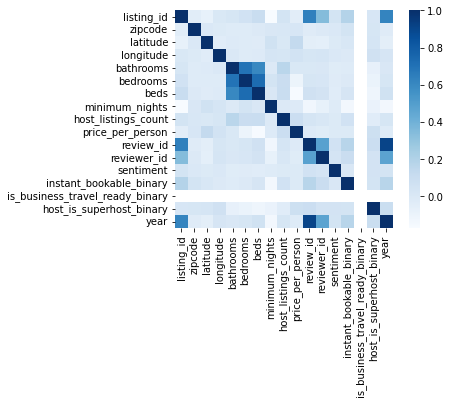

In [47]:
import seaborn as sns
corrmat = merged.corr()
sns.heatmap(corrmat, square = True, annot=False, cmap="Blues") # Blues, Greens, Reds

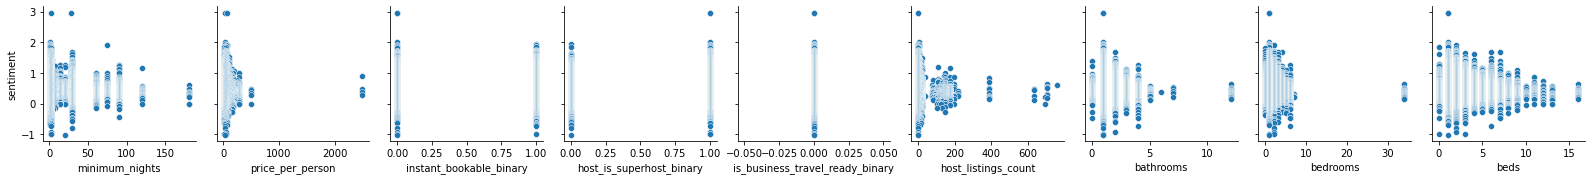

In [56]:
#pairplot to show sentiment vs various independent variables
sns.pairplot(data=merged, y_vars=['sentiment'], x_vars=['minimum_nights', 'price_per_person','instant_bookable_binary','host_is_superhost_binary','is_business_travel_ready_binary','host_listings_count','bathrooms','bedrooms','beds'])

In [57]:
merged.isnull().sum()
merged = merged.dropna(how='any')
merged.shape
# statsmodels:
import statsmodels.api as sm

Y1=merged['sentiment']
X1=merged[['minimum_nights','price_per_person','host_listings_count','instant_bookable_binary','host_is_superhost_binary','is_business_travel_ready_binary','bathrooms','bedrooms','beds']]
X1=sm.add_constant(X1)
X1
model1 = sm.OLS(Y1, X1) 
results1 = model1.fit()
results1.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sentiment   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     73.78
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          5.30e-122
Time:                        01:18:40   Log-Likelihood:                 37634.
No. Observations:              147163   AIC:                        -7.525e+04
Df Residuals:                  147154   BIC:                        -7.516e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.3885      0.002    204.981      0.000       0.385       0.392
minimum_nights                     -0.0003   4.56e-05     -6.981      0.000      -0.000      -0.000
price_per_person                   -0.0002   2.01e-05     -8.025      0.000      -0.000      -0.000
host_listings_count                -0.0001   4.69e-05     -3.003      0.003      -0.000    -4.9e-05
instant_bookable_binary             0.0014      0.001      1.383      0.167      -0.001       0.003
host_is_superhost_binary            0.0168      0.001     14.641      0.000       0.015       0.019
is_business_travel_ready_binary  2.636e-17   4.77e-19     55.222      0.000    2.54e-17    2.73e-17
bathrooms                          -0.0056      0.002     -3.600      0.000      -0.009      -0.003
bedrooms                            0.0019      0.001      2.210      0.027       0.000       0.004
beds                               -0.0053      0.001     -8.694      0.000      -0.006      -0.004
==============================================================================
Omnibus:                    28958.948   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123372.829
Skew:                           0.917   Prob(JB):                         0.00
Kurtosis:                       7.094   Cond. No.                     1.36e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From the above regression, we can note that : 

1. R squared value is very low at 0.004, which means the dependent variables are not able to explain the variance in the independent variable and can only explain 0.4% of the variance. 
2. the column - 'instant_bookable_binary' is not a good fit to the model as it contains the value '0' within the interval of [0.025 - 0.975], which is the 95% confidence interval. 
3. our Covariance type is 'nonrobust', which means we cannot minimize or eliminate variables. 
4. for 5 of our independent variables, the coefficient of regression is NEGATIVE, which means if these variables increase, sentiment DECREASES and vice versa.  (negative correlation)
5. for 3 of our independent variables, the coefficient of regression is POSITIVE, which means if these variables increase, sentiment INCREASES and vice versa (positive correlation)

In [63]:
#taking sample of the original data set 

sampleMerged = merged.sample(frac=0.1, replace=False, random_state=1) #taking 10% sample of original data
sampleMerged.head()

Y2=sampleMerged['sentiment']
X2=sampleMerged[['minimum_nights','price_per_person','host_listings_count','instant_bookable_binary','host_is_superhost_binary','is_business_travel_ready_binary','bathrooms','bedrooms','beds']]
X2=sm.add_constant(X2)

model2 = sm.OLS(Y2, X2) 
results2 = model2.fit()
results2.summary() #taking 10% fraction, R squared increased to 0.006 from 0.004. 

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sentiment   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     10.18
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           2.77e-14
Time:                        01:20:55   Log-Likelihood:                 3700.9
No. Observations:               14716   AIC:                            -7384.
Df Residuals:                   14707   BIC:                            -7316.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.3849      0.006     62.449      0.000       0.373       0.397
minimum_nights                     -0.0003      0.000     -2.350      0.019      -0.001   -5.54e-05
price_per_person                   -0.0002   7.48e-05     -2.936      0.003      -0.000    -7.3e-05
host_listings_count                -0.0003      0.000     -1.940      0.052      -0.001    2.73e-06
instant_bookable_binary             0.0031      0.003      0.973      0.330      -0.003       0.009
host_is_superhost_binary            0.0203      0.004      5.560      0.000       0.013       0.027
is_business_travel_ready_binary -1.806e-18   6.61e-18     -0.273      0.785   -1.48e-17    1.12e-17
bathrooms                          -0.0012      0.005     -0.240      0.811      -0.011       0.009
bedrooms                            0.0019      0.003      0.704      0.481      -0.003       0.007
beds                               -0.0069      0.002     -3.630      0.000      -0.011      -0.003
==============================================================================
Omnibus:                     2816.930   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10380.444
Skew:                           0.931   Prob(JB):                         0.00
Kurtosis:                       6.669   Cond. No.                     1.34e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.6e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [119]:
dummyData = pd.get_dummies(merged, columns=['room_type','property_type'])
dummyData['instant_bookable_binary']=np.where(dummyData.instant_bookable == 't',1,0)
dummyData['is_business_travel_ready_binary']=np.where(dummyData.is_business_travel_ready == 't',1,0)
dummyData['host_is_superhost_binary']=np.where(dummyData.host_is_superhost == 't',1,0)

dummyData.fillna({'bathrooms':dummyData['bathrooms'].mean(),'beds':dummyData['beds'].mean(),'zipcode':00000.0,'is_business_travel_ready':'f'}, inplace=True)
dummyData.dropna(how='any', inplace=True)
dummyData.columns


Y10=dummyData['sentiment']
X10=dummyData[['minimum_nights','price_per_person','host_listings_count','instant_bookable_binary','host_is_superhost_binary','is_business_travel_ready_binary','bathrooms','bedrooms','beds','room_type_Entire home/apt','room_type_Hotel room','room_type_Private room','room_type_Shared room', 'property_type_Apartment', 'property_type_Bed & Breakfast',
       'property_type_Bed and breakfast', 'property_type_Boutique hotel',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Campsite',
       'property_type_Chalet', 'property_type_Condominium',
       'property_type_Cottage', 'property_type_Earth House',
       'property_type_Entire apartment', 'property_type_Entire bungalow',
       'property_type_Entire cabin', 'property_type_Entire chalet',
       'property_type_Entire condominium',
       'property_type_Entire condominium (condo)',
       'property_type_Entire cottage', 'property_type_Entire guest suite',
       'property_type_Entire guesthouse', 'property_type_Entire house',
       'property_type_Entire loft', 'property_type_Entire place',
       'property_type_Entire rental unit',
       'property_type_Entire residential home',
       'property_type_Entire townhouse', 'property_type_Entire vacation home',
       'property_type_Farm stay', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_House',
       'property_type_In-law', 'property_type_Loft', 'property_type_Other',
       'property_type_Private room', 'property_type_Private room in apartment',
       'property_type_Private room in bed and breakfast',
       'property_type_Private room in bungalow',
       'property_type_Private room in cabin',
       'property_type_Private room in castle',
       'property_type_Private room in condominium',
       'property_type_Private room in condominium (condo)',
       'property_type_Private room in cottage',
       'property_type_Private room in farm stay',
       'property_type_Private room in guest suite',
       'property_type_Private room in house',
       'property_type_Private room in loft',
       'property_type_Private room in rental unit',
       'property_type_Private room in residential home',
       'property_type_Private room in townhouse',
       'property_type_Room in bed and breakfast',
       'property_type_Room in boutique hotel', 'property_type_Room in hotel',
       'property_type_Shared room in hostel',
       'property_type_Shared room in rental unit', 'property_type_Tent',
       'property_type_Tiny house', 'property_type_Townhouse',
       'property_type_Treehouse', 'property_type_Yurt']]

X10=sm.add_constant(X10)
X10
model1 = sm.OLS(Y10, X10) 
results10 = model1.fit()
results10.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sentiment   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     20.81
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          3.40e-253
Time:                        11:31:55   Log-Likelihood:                 38061.
No. Observations:              147163   AIC:                        -7.598e+04
Df Residuals:                  147093   BIC:                        -7.529e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                             -1.109e+10   4.52e+09     -2.453      0.014   -1.99e+10   -2.23e+09
minimum_nights                                       -0.0001   6.68e-05     -1.971      0.049      -0.000   -7.15e-07
price_per_person                                  -7.672e-05   2.13e-05     -3.595      0.000      -0.000   -3.49e-05
host_listings_count                                  -0.0001   4.71e-05     -2.209      0.027      -0.000   -1.17e-05
instant_bookable_binary                               0.0025      0.001      2.463      0.014       0.001       0.004
host_is_superhost_binary                              0.0171      0.001     14.298      0.000       0.015       0.019
is_business_travel_ready_binary                      -0.0006      0.000     -2.453      0.014      -0.001      -0.000
bathrooms                                            -0.0066      0.002     -4.133      0.000      -0.010      -0.003
bedrooms                                              0.0017      0.001      1.809      0.070      -0.000       0.003
beds                                                 -0.0023      0.001     -3.582      0.000      -0.004      -0.001
room_type_Entire home/apt                          1.054e+10    4.3e+09      2.453      0.014    2.12e+09     1.9e+10
room_type_Hotel room                               7.392e+09   3.01e+09      2.453      0.014    1.49e+09    1.33e+10
room_type_Private room                             1.054e+10    4.3e+09      2.453      0.014    2.12e+09     1.9e+10
room_type_Shared room                              1.054e+10    4.3e+09      2.453      0.014    2.12e+09     1.9e+10
property_type_Apartment                            5.453e+08   2.22e+08      2.453      0.014     1.1e+08    9.81e+08
property_type_Bed & Breakfast                      5.453e+08   2.22e+08      2.453      0.014     1.1e+08    9.81e+08
property_type_Bed and breakfast                    5.453e+08   2.22e+08      2.453      0.014     1.1e+08    9.81e+08
property_type_Boutique hotel                       5.453e+08   2.22e+08      2.453      0.014     1.1e+08    9.81e+08
property_type_Bungalow                             5.453e+08   2.22e+08      2.453      0.014     1.1e+08    9.81e+08
property_type_Cabin                                5.453e+08   2.22e+08      2.453      0.014     1.1e+08    9.81e+08
property_type_Camper/RV                            5.453e+08   2.22e+08      2.453      0.014     1.1e+08    9.81e+08
property_type_Campsite                             5.453e+08   2.22e+08      2.453      0.014     1.1e+08    9.81e+08
property_type_Chalet                               5.453e+08   2.22e+08      2.453      0.014     1.1e+08    9.81e+08
property_type_C

In the above attempt, I tried to create a dummy dataframe using get_dummies() function from pandas to create binary values for each category in property_type and room_type. Finally, I added all these independent variables to my regression model in an attempt to find a better R squared value. 

Result: R squared improved from 0.004 to 0.010, now explaining 1% of variance in this data set. 

In [76]:
#Natural log on sentiment 
#To take natural log, adding the sentiment column entirely by integer '2'
merged.sentiment = merged.sentiment + 2
merged['SentimentLog'] = np.log(merged['sentiment'])
Y4=merged['SentimentLog']
X4=merged[['minimum_nights','price_per_person','host_listings_count','instant_bookable_binary','host_is_superhost_binary','is_business_travel_ready_binary','bathrooms','bedrooms','beds']]

X4=sm.add_constant(X4)
model4 = sm.OLS(Y4, X4) 
results4 = model4.fit()
results4.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           SentimentLog   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     75.08
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          3.15e-124
Time:                        01:35:37   Log-Likelihood:             3.1201e+05
No. Observations:              147163   AIC:                        -6.240e+05
Df Residuals:                  147154   BIC:                        -6.239e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               1.8540      0.000   6311.663      0.000       1.853       1.855
minimum_nights                  -4.868e-05   7.07e-06     -6.884      0.000   -6.25e-05   -3.48e-05
price_per_person                -2.453e-05   3.11e-06     -7.889      0.000   -3.06e-05   -1.84e-05
host_listings_count             -2.276e-05   7.27e-06     -3.129      0.002    -3.7e-05   -8.51e-06
instant_bookable_binary             0.0002      0.000      1.167      0.243      -0.000       0.000
host_is_superhost_binary            0.0027      0.000     14.990      0.000       0.002       0.003
is_business_travel_ready_binary  2.328e-17   1.74e-19    134.149      0.000    2.29e-17    2.36e-17
bathrooms                          -0.0009      0.000     -3.632      0.000      -0.001      -0.000
bedrooms                            0.0003      0.000      2.253      0.024    3.94e-05       0.001
beds                               -0.0008   9.41e-05     -8.729      0.000      -0.001      -0.001
==============================================================================
Omnibus:                    21198.581   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78646.161
Skew:                           0.700   Prob(JB):                         0.00
Kurtosis:                       6.296   Cond. No.                     8.03e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.8e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In the above atempt, I took the log of the dependent variable - sentiment - in an attempt to get a better R Squared value. As sentiment values were negative, I had to add numeric 2 to all entries in the sentiment column as maximum negative value was greater than -2, hence if we add 2 to the entire column, all values in the column would be positive. 

Result: there was no improvement in R squared value and it was still at 0.004

<AxesSubplot:xlabel='sentiment', ylabel='Count'>

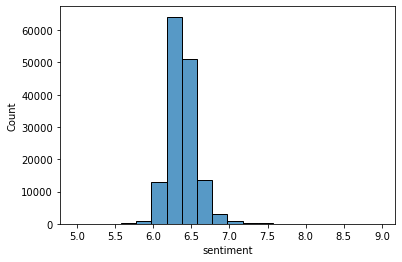

In [82]:
sns.histplot(data=merged, x="sentiment", bins=20)

Histogram showing sentiment score in bins of 20

<AxesSubplot:xlabel='SentimentLog', ylabel='Count'>

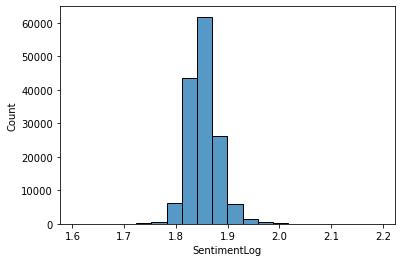

In [83]:
sns.histplot(data=merged, x="SentimentLog", bins=20)

Histogram showing the LOG of sentiment score in bins of 20